In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\diabetes (1).csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**There is no null value according to analysis.**

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
## Here, we see many 0 values so it will replacing with mean value.

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

<AxesSubplot:>

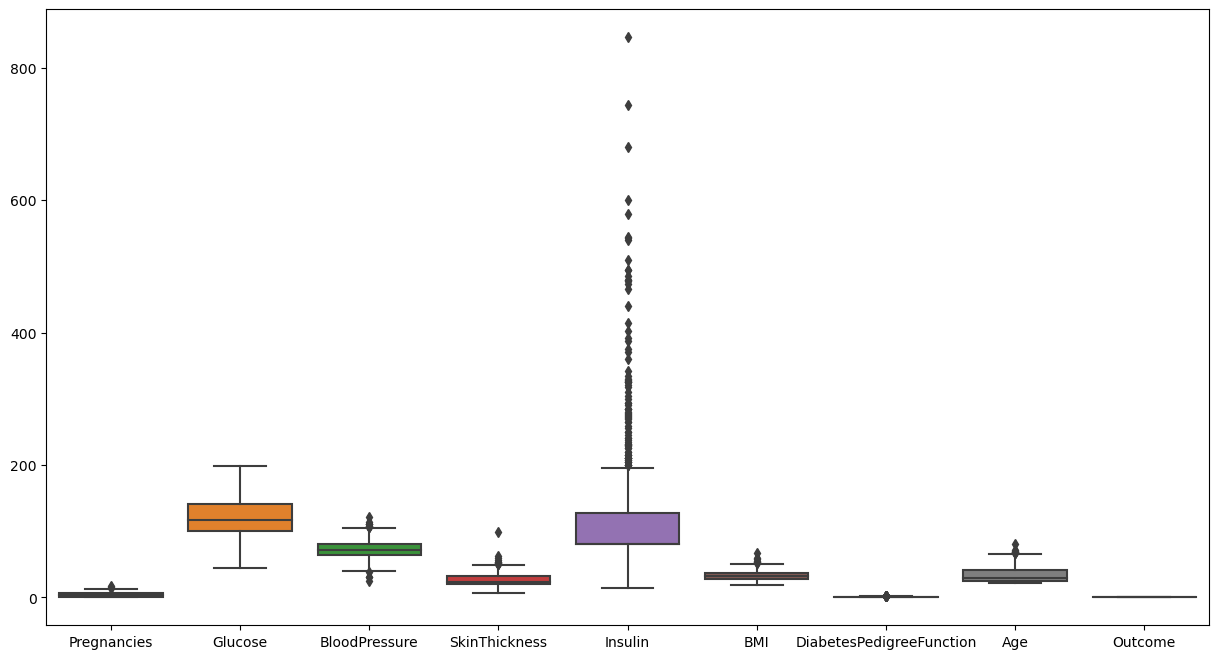

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [12]:
## Segregate the dependent and independent feature

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [13]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [14]:
import pickle

def scaler_standard(X_train, X_test):
    ## Scaling Data
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)
    ## save the model
    file = open("myfile.pkl", "wb")
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scale,X_test_scale

In [15]:
X_train_scale, X_test_scale = scaler_standard(X_train,X_test)

In [16]:
X_train_scale

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [17]:
X_test_scale

array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
         2.78665365, -0.96584853],
       [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43304331, -1.06780314, ..., -1.03985921,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.20007091,  0.44759974, ..., -1.65633158,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13280114,  0.44759974, ..., -0.72445475,
        -0.63396981,  0.28489057]])

In [18]:
## Here we have to do Hypertunning so we can see which parameter is best for fit
## We can use also GridSearchcv

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
grid_search = GridSearchCV(clf,parameter,cv=5)

In [24]:
grid_search.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [25]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [26]:
grid_search.best_score_

0.7377811094452774

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [28]:
y_pred = grid_search.predict(X_test_scale)

In [29]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
Confusion_Matrix = confusion_matrix(y_test,y_pred)
Accuracy = accuracy_score(y_test, y_pred)
Precision_Score = precision_score(y_test,y_pred)
Recall_Score = recall_score(y_test,y_pred)
F1_Score = f1_score(y_test,y_pred)

In [31]:
print(Confusion_Matrix)
print(Accuracy)
print(Precision_Score)
print(Recall_Score)
print(F1_Score)

[[116  14]
 [ 35  27]]
0.7447916666666666
0.6585365853658537
0.43548387096774194
0.5242718446601943


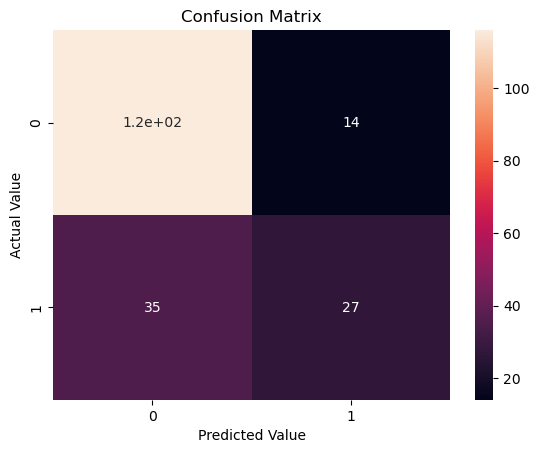

In [32]:
sns.heatmap(Confusion_Matrix, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

### Plot The ROC Curve

In [33]:
y_prob = grid_search.predict_proba(X_test_scale)[:,1]

In [34]:
fpr, tpr, threesold = roc_curve(y_test,y_prob)

In [35]:
fpr

array([0.        , 0.05384615, 0.08461538, 0.10769231, 0.13846154,
       0.36153846, 0.36153846, 0.36923077, 0.53846154, 0.61538462,
       1.        ])

In [36]:
tpr

array([0.        , 0.25806452, 0.38709677, 0.43548387, 0.48387097,
       0.75806452, 0.80645161, 0.82258065, 0.90322581, 0.91935484,
       1.        ])

In [37]:
threesold

array([2.        , 1.        , 0.72727273, 0.56521739, 0.5       ,
       0.44776119, 0.38095238, 0.2       , 0.12121212, 0.08333333,
       0.        ])

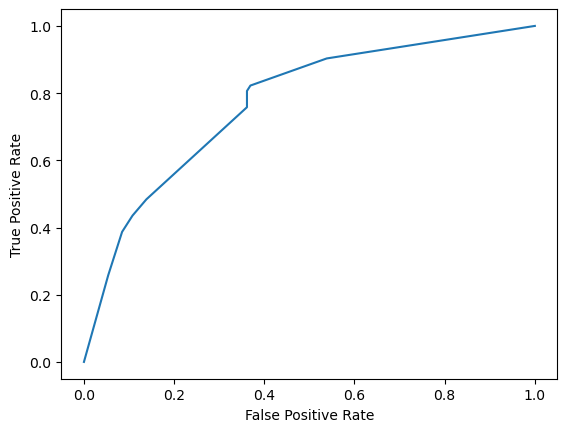

In [38]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
from sklearn import tree

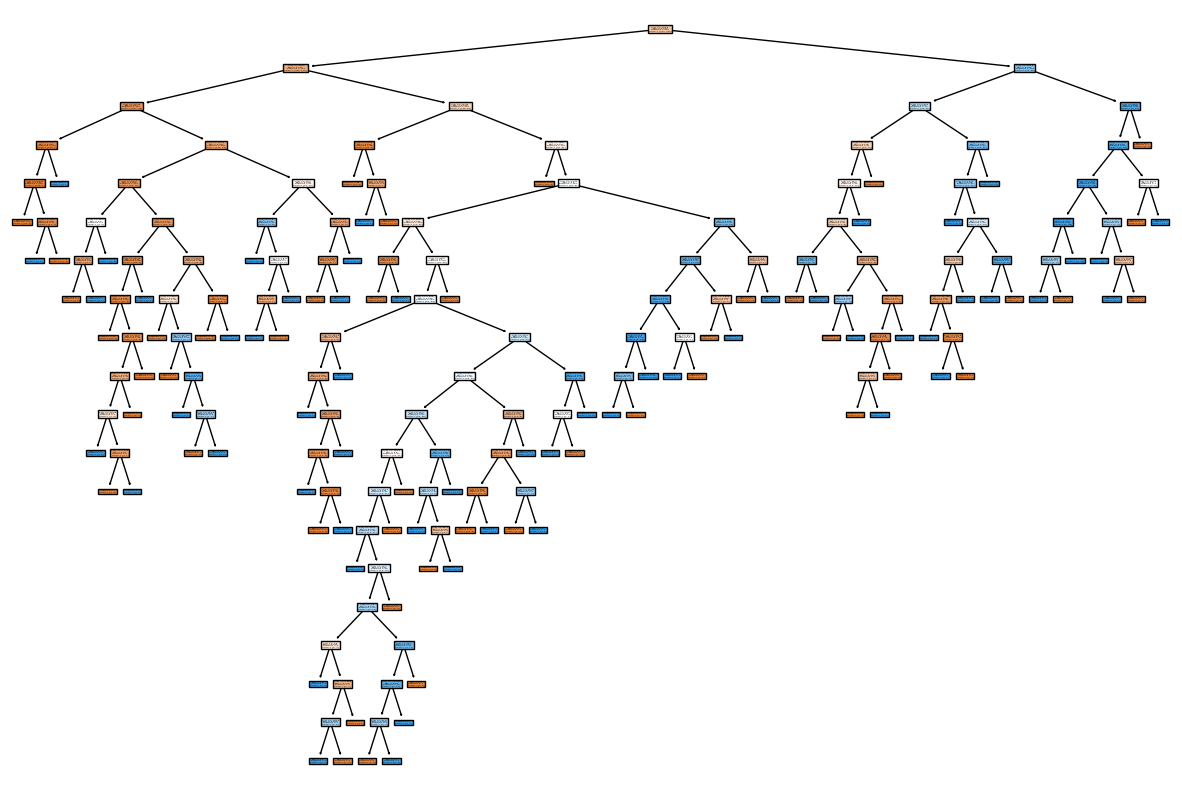

In [40]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled = True)
plt.show()

### 7.

To interpret a decision tree, you need to examine its splits, branches, and leaves. The splits represent the decision points based on different variables, while the branches indicate the outcomes or paths taken based on those splits. The leaves of the decision tree represent the final predictions or classifications.

To identify the most important variables and their thresholds, we need to look at the top-level splits in the decision tree. Typically, the variables that appear closer to the root of the tree and have the most significant impact on the outcome are considered more important.

Let's consider an example to illustrate this:

Suppose we have a decision tree that predicts whether a person is likely to purchase a car based on their demographic and financial information. The decision tree may have splits based on variables such as age, income, credit score, and location. If the age split appears near the root of the tree, it suggests that age is an essential factor in determining car purchase decisions. For example, if the split is "age > 30," it implies that people above the age of 30 have a higher likelihood of purchasing a car. Similarly, if the income split is significant, it indicates that income plays a crucial role in determining car purchases. For instance, if the split is "income > $50,000," it suggests that people with higher incomes are more likely to buy a car.

Credit score could be another important variable. If the split is "credit score > 700," it means that individuals with good credit scores are more inclined to purchase a car, as they may have better financing options or more favorable terms.

Lastly, location could be a significant factor as well. If the split is "urban area," it suggests that people living in urban areas are more likely to buy cars due to factors such as accessibility to public transportation, parking availability, or lifestyle preferences.

### 8.

Validating a decision tree model involves assessing its performance on new data and testing its robustness to changes in the dataset or the environment. Sensitivity analysis and scenario testing can help explore uncertainty and risks associated with the model. Here's an outline of the process:

Obtain new data: Gather a new dataset that is separate from the one used to train the decision tree model. This dataset should represent the real-world scenarios that the model will encounter.

Data preprocessing: Apply the same preprocessing steps to the new data as you did during model training. This includes handling missing values, encoding categorical variables, and scaling numerical features.

Evaluate performance metrics: Apply the decision tree model to the new data and assess its performance using appropriate metrics. Common evaluation metrics for classification problems include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC). For regression problems, metrics such as mean squared error (MSE) or R-squared can be used.

Compare performance: Compare the performance of the decision tree model on the new data with its performance on the training data. If the performance on the new data is significantly worse, it might indicate overfitting.

Robustness testing: Introduce changes to the dataset or environment to test the model's robustness. For example, you can perturb the values of certain features or introduce missing values to assess how well the model handles such variations. Evaluate the model's performance on these modified datasets and compare it with the original performance.

Sensitivity analysis: Perform sensitivity analysis to understand the impact of changes in input variables on the model's predictions. Vary one input variable at a time while keeping others constant and observe the resulting changes in predictions. This helps identify which variables have the most significant influence on the model's outcomes and can provide insights into the model's stability and reliability.

Scenario testing: Create specific scenarios or hypothetical situations that represent potential risks or uncertainties. For each scenario, apply the decision tree model and examine the outcomes. This allows you to assess how the model responds to different conditions and identify potential vulnerabilities or biases.

Iterate and refine: Based on the results of the validation, sensitivity analysis, and scenario testing, make any necessary adjustments to the decision tree model. This may involve fine-tuning hyperparameters, addressing overfitting, or improving the model's generalization capabilities.

In [41]:
f = open("decisiontree.pkl","wb")
pickle.dump(clf,f)
f.close()